In [181]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
data = pd.read_csv("auto_complectations.csv")
pd.set_option('display.max_columns', None)
data.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,Привод,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),полный,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [183]:
data.columns

Index(['brand', 'model', 'complect', 'type_car', 'seats', 'doors', 'Двигатель',
       'Мощность', 'Крутящий момент двигателя', 'Коробка передач', 'Привод',
       'Разгон до сотни', 'Максимальная скорость',
       'Расход топлива (л/100 км)\nгород / трасса / смешанный',
       'Дорожный просвет', 'Габариты (длина × ширина × высота)',
       'Колёсная база', 'Объём багажника', 'Объём багажника максимальный',
       'Объём топливного бака', 'Масса автомобиля'],
      dtype='object')

# Подготовка данных 
Разделю на разные столбцы такое колонки как: двигатель, коробка передач, расход топлива, габариты

In [184]:
data[['Тип двигателя','Объем двигателя']] = data['Двигатель'].str.split(' ', 1, expand=True)

data[['Тип КП', 'Кол-во передач']] = data['Коробка передач'].str.split(' ', 1, expand=True)

data[['Город расход', 'Трасса расход', 'Cмеш. расход']] = data['Расход топлива (л/100 км)\nгород / трасса / смешанный'].str.split('/', 2, expand=True)

data[['длина', 'ширина', 'высота']] = data['Габариты (длина × ширина × высота)'].str.split('×', 2, expand=True)   

In [185]:
data['Объем двигателя'] = [(x.lstrip('(').rstrip(')')) for x in data['Объем двигателя']]

data['Кол-во передач'] = [(x.lstrip('(').rstrip('ступеней)')) for x in data['Кол-во передач']]

In [186]:
data = data.drop(columns=['brand', 'model', 'complect', 'Двигатель', 'Коробка передач', 'Расход топлива (л/100 км)\nгород / трасса / смешанный', 'Габариты (длина × ширина × высота)']) # удаляю все не нужные столбцы

## Преобразование переменных

In [187]:
column_dict = {'Мощность': 'л. с.', 'Крутящий момент двигателя': 'Н·м', 'Разгон до сотни': 'секунды',  'Максимальная скорость': 'км/ч', 'Дорожный просвет': 'мм','Колёсная база': 'мм',
                     'Объём багажника максимальный': 'л','Объём топливного бака': 'л', 'Масса автомобиля':'кг', 'Объем двигателя': 'см³', 'Кол-во передач': 'кол-во', 'Город расход': 'л на 100 км', 'Трасса расход': 'л на 100 км', 'Cмеш. расход': 'л на 100 км',
              'длина': 'мм', 'ширина': 'мм', 'высота': 'мм'}


def del_text(column_name, key):
    data[column] = [x.rstrip(column_dict[column]) for x in data[column]] #удаляем тектостовое значение "key"

    data[column] = pd.to_numeric(data[column],errors = 'coerce') #приводим текстовое значение к числовому   
        
    return data[column]


for column in column_dict:
    del_text(column, column_dict[column])

### Классификация методом RandomForest
- простота и точность

In [189]:
col = ['seats', 'doors', 'Мощность', 'Крутящий момент двигателя',
       'Привод', 'Разгон до сотни', 'Максимальная скорость',
       'Дорожный просвет', 'Колёсная база', 'Объём багажника максимальный',
       'Объём топливного бака', 'Масса автомобиля', 'Тип двигателя',
       'Объем двигателя', 'Тип КП', 'Кол-во передач', 'Город расход',
       'Трасса расход', 'Cмеш. расход', 'длина', 'ширина', 'высота']


# преобразование категорийных данных в количественные, и заполнение пропусков наиболее вероятным значением
X = pd.DataFrame() #на этом дата-сете будем предсказывать
for i in col:
    if data[i].dtype.name != 'object':
        X[i] = data[i].copy()
        X.loc[X[i].isna(),i] = X[i].median()
    else:
        X[i] = pd.factorize(data[i])[0]

In [190]:
X.sample(3)

,seats,doors,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Тип двигателя,Объем двигателя,Тип КП,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
1226,5,5,109,240,1,13.2,167,210,2673,1570,50,1390,1,1461,2,6,5.9,5.0,5.3,4315,1822,1695
992,5,5,150,208,1,10.6,184,200,2700,1560,58,1588,0,1998,1,6,8.2,5.9,6.7,4550,1840,1675
1428,7,5,166,245,1,12.0,180,225,2745,620,87,2160,0,2694,1,6,13.6,9.3,10.9,4795,1855,1835


In [210]:
data.describe()

,seats,doors,Мощность,Крутящий момент двигателя,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника максимальный,Объём топливного бака,Масса автомобиля,Объем двигателя,Кол-во передач,Город расход,Трасса расход,Cмеш. расход,длина,ширина,высота
count,1703.000000,1703.000000,1703.000000,1703.000000,1632.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1462.000000,1470.000000,1648.000000,1703.000000,1703.000000,1703.000000
mean,5.079272,4.887845,214.372871,349.022901,8.790870,207.581914,176.041691,2802.910159,1360.088667,64.200235,1722.111568,2256.011744,6.472695,9.567031,6.183469,7.430765,4696.175573,1877.691133,1620.227833
std,0.677096,1.024259,102.459760,161.896164,2.424762,31.897643,47.857125,170.954367,947.489501,14.770209,364.277837,856.798708,2.337363,2.718221,1.258390,1.815388,303.426368,92.999923,165.189194
min,1.000000,2.000000,67.000000,0.000000,3.200000,0.000000,0.000000,2250.000000,0.000000,0.000000,885.000000,0.000000,0.000000,4.900000,3.700000,1.900000,3595.000000,1595.000000,17.000000
25%,5.000000,4.000000,150.000000,213.000000,6.900000,186.000000,155.000000,2670.000000,520.000000,55.000000,1443.000000,1598.000000,6.000000,7.800000,5.300000,6.200000,4447.000000,1815.000000,1474.000000
50%,5.000000,5.000000,186.000000,340.000000,8.700000,205.000000,184.000000,2791.000000,1421.000000,60.000000,1685.000000,1997.000000,7.000000,9.000000,6.000000,7.200000,4697.000000,1860.000000,1630.000000
75%,5.000000,5.000000,249.000000,439.500000,10.600000,230.000000,210.000000,2923.000000,1731.000000,72.000000,1960.000000,2694.000000,8.000000,10.600000,6.700000,8.200000,4933.000000,1937.000000,1715.000000
max,9.000000,8.000000,639.000000,900.000000,17.600000,322.000000,291.000000,3860.000000,5800.000000,138.000000,2817.000000,6592.000000,10.000000,20.600000,11.700000,14.500000,5915.000000,2157.000000,2280.000000


<AxesSubplot:>

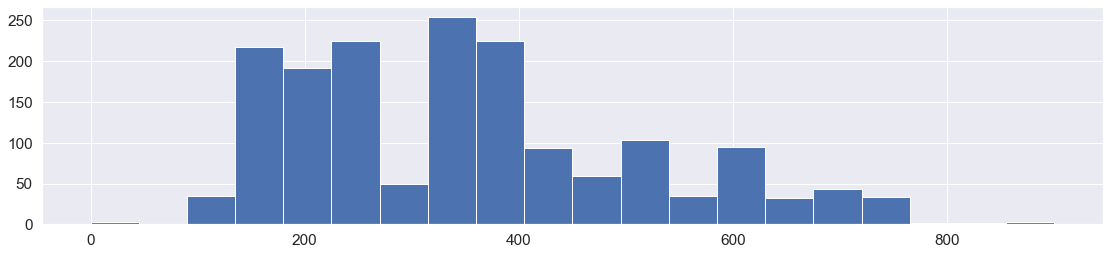

In [242]:
data['Крутящий момент двигателя'].hist(bins=20, figsize=(19, 4))

In [249]:
data[data['Крутящий момент двигателя'] > 320].count()

type_car                        869
seats                           869
doors                           869
Мощность                        869
Крутящий момент двигателя       869
Привод                          869
Разгон до сотни                 816
Максимальная скорость           869
Дорожный просвет                869
Колёсная база                   869
Объём багажника                 869
Объём багажника максимальный    869
Объём топливного бака           869
Масса автомобиля                869
Тип двигателя                   869
Объем двигателя                 869
Тип КП                          869
Кол-во передач                  869
Город расход                    695
Трасса расход                   701
Cмеш. расход                    829
длина                           869
ширина                          869
высота                          869
dtype: int64

In [250]:
Y = data['Крутящий момент двигателя'].apply(lambda x: 1 if x> 320 else 0).values 

In [251]:
#разделяю набор на тестовый и тренировочный
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [252]:
# создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [253]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.3338, 'Крутящий момент двигателя'],
 [0.1486, 'Мощность'],
 [0.1167, 'Масса автомобиля'],
 [0.0741, 'ширина'],
 [0.0505, 'Кол-во передач'],
 [0.0484, 'Колёсная база'],
 [0.0416, 'Привод'],
 [0.0313, 'Разгон до сотни'],
 [0.0282, 'Объем двигателя'],
 [0.0248, 'Тип двигателя'],
 [0.0233, 'Объём топливного бака'],
 [0.0206, 'Максимальная скорость'],
 [0.0148, 'Cмеш. расход'],
 [0.011, 'длина'],
 [0.0081, 'Трасса расход'],
 [0.0071, 'Город расход'],
 [0.0045, 'Дорожный просвет'],
 [0.0044, 'высота'],
 [0.0033, 'Тип КП'],
 [0.0033, 'Объём багажника максимальный'],
 [0.0012, 'seats'],
 [0.0003, 'doors']]

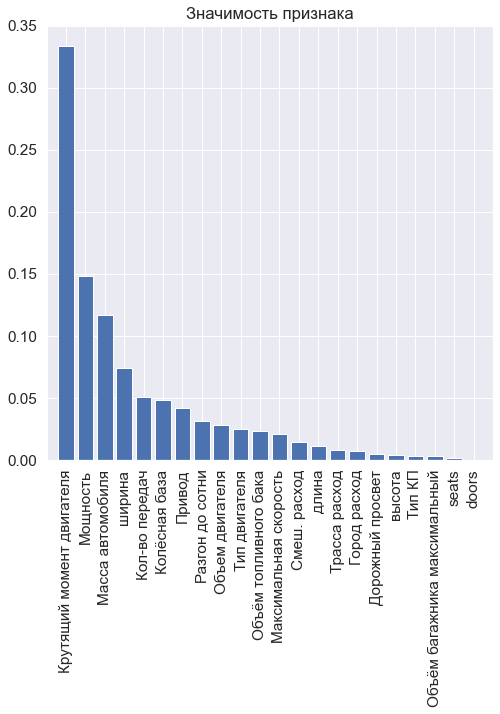

In [254]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [255]:
# как выглядит результат предсказания для тестовой выборки
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [256]:
# как выглядядт результаты тестового набора
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [257]:
from sklearn import metrics
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9980430528375733


In [258]:
# матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[237,   0],
       [  1, 273]], dtype=int64)

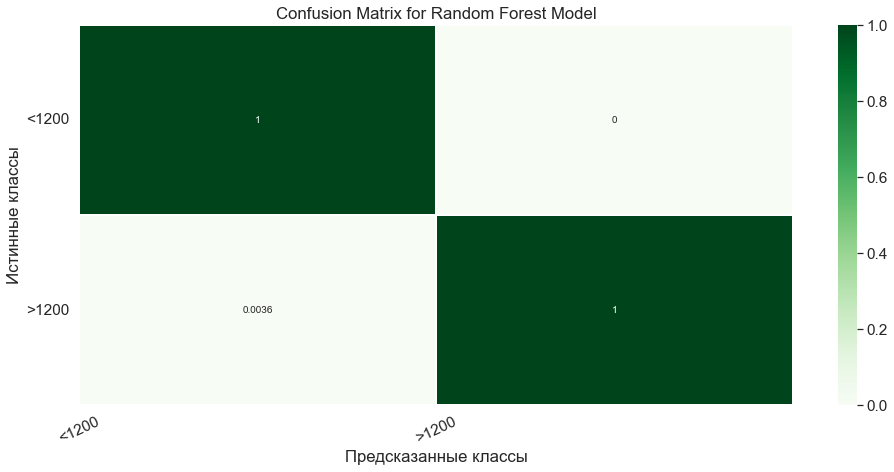

In [259]:
# так же матрица в процентах и более изящном виде
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['<1200', '>1200']                 
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [260]:

# Еще базовые метрики оценки точности модели
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00       274

    accuracy                           1.00       511
   macro avg       1.00      1.00      1.00       511
weighted avg       1.00      1.00      1.00       511

